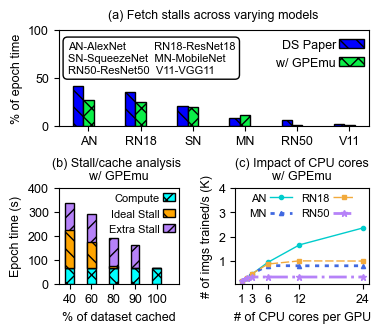

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

title_font_size = 20
textfontsize = 9

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = textfontsize


columns = ['cache', 'io', 'cpu2gpu', 'gpu']
df = pd.read_csv('cache/ds-cache-emu.csv', sep='\t', header=None, names=columns)

io = df['io'].tolist()
cpu2gpu = df['cpu2gpu'].tolist()
gpu = df['gpu'].tolist()

# must be modified.
# TODO: How did Mike compute this ideal? need to verify
ideal = [158.846, 109.486, 10.627, 1.145, 0.000]

# create plot
grid = GridSpec(2, 2, width_ratios=[9,10])
fig = plt.figure(figsize=(4, 3.3))
fig.subplots_adjust(wspace=0.45, hspace=0.65)
ax1 = fig.add_subplot(grid[0, :])
ax2 = fig.add_subplot(grid[1, 0])
ax3 = fig.add_subplot(grid[1, 1])

ax2.set_ylim(0,400)
ytics = range(0,450,100)
ax2.set_xlim(-0.5,5)
# ax1.set_yticks([2800])
ax2.tick_params(axis='y', labelsize=20)

bar_width = 0.4
opacity = 1

xtics = df.index
xlabels = df['cache'].to_list()
xlabels = ['{:.0f}'.format(c*100) for c in xlabels]

bottom = [0 for i in gpu]
gpubars = ax2.bar(xtics, gpu, bar_width,
    color='cyan',
    label='Compute',
    hatch="xx", edgecolor="black"
)

bottom = [bottom[i]+gpu[i] for i in range(len(bottom))]
iobars = ax2.bar(xtics, io, bar_width, bottom=bottom,
    color='#B682F8',
    label='Extra Stall',
    hatch="//", edgecolor="black"
)

bottom = [bottom[i] for i in range(len(bottom))]
idealbars = ax2.bar(xtics, ideal, bar_width, bottom=bottom,
    color='orange',
    label='Ideal Stall', edgecolor="black"
)
for bar in idealbars:
    bar.set_hatch('\\\\')


ax2.set_ylabel('Epoch time (s)', fontsize=textfontsize)
ax2.set_xlabel('% of dataset cached', fontsize=textfontsize)


ax2.set_xticks(xtics, xlabels, fontsize=textfontsize)
ax2.set_yticks(ytics, ytics, fontsize=textfontsize)
# plt.title('Fetch Stall Time (Emulator)\nOn HDD + 24 workers + 8GPUs (emulated by p100)')
title = ax2.set_title('(b) Stall/cache analysis \nw/ GPEmu', pad=6, fontsize=textfontsize)
title.set_position((0.5, 0.2))

# legend reverse order
legend_order = [0, 2, 1]
handles, labels = ax2.get_legend_handles_labels()
ax2.legend([handles[idx] for idx in legend_order],
           [labels[idx] for idx in legend_order],
           markerfirst=False,
           loc="upper right", fontsize=textfontsize - 1, ncols=1,
           handlelength=1, handletextpad=0.3, columnspacing=0.5, frameon=False,
           bbox_to_anchor=(1.05, 1.05))


################################################################################
columns = ['alexnet',"renet18",'mobilenet_v2','resnet50']
df = pd.read_csv('cpu/ds-cpu-emu.csv', sep='\t', header=None, names=columns)

alexnet = df['alexnet'].tolist()
renet18 = df['renet18'].tolist()
mobilenet_v2 = df['mobilenet_v2'].tolist()
resnet50 = df['resnet50'].tolist()
# Sample data for three lines
x = [1, 2, 3, 6, 12, 24]
y = [1000, 2000, 3000, 4000]
y_label = ["1", "2", "3", "4"]
y1 = alexnet
y2 = renet18
y3 = mobilenet_v2
y4 = resnet50

# Plotting the lines
ax3.plot(x, y1, marker='o', color = "#00cccc", label='AN', markersize=3, linestyle='-', linewidth=1)
ax3.plot(x, y3, marker='^', color = "royalblue", label='MN', markersize=3, linestyle='--', dashes=[1.5,2], linewidth=2)
ax3.plot(x, y2, marker='s', color = "#F2AA3C", label='RN18', markersize=3, linestyle='--', dashes=[6,2], linewidth=1)
ax3.plot(x, y4, marker='*', color = "#B682F8", label='RN50', markersize=5, linestyle='-.', linewidth=2)

xtics = [1, 3, 6, 12, 24]
# Adding labels and title
ax3.set_xlabel('# of CPU cores per GPU', fontsize=textfontsize)
ax3.set_ylabel('# of imgs trained/s (K)', fontsize=textfontsize)
ax3.set_title('(c) Impact of CPU cores\nw/ GPEmu', fontsize=textfontsize, pad=6)
ax3.set_xticks(xtics, xtics, fontsize=textfontsize)
ax3.set_yticks(y, y)
ax3.set_yticklabels(y_label, fontsize=textfontsize)

# Adding a legend
ax3.legend(fontsize=textfontsize - 1, markerfirst=False, ncol=2, handletextpad=0.3, columnspacing=0.8, loc="upper center", frameon=False,
           bbox_to_anchor=(0.5, 1.05))


################################################################################
columns = ['model', 'emu', 'paper']

# ssd, 24 workers, 8 v100
df = pd.read_csv('fetch/ds-fetch-emu.csv', sep='\t', header=None, names=columns)

num_subcategories = 2
emulated_values = df['emu'].tolist()
paper_values = df['paper'].tolist()
models = df['model'].tolist()
categories = models

bar_width = 0.2
emulated_values = [num * 100 for num in emulated_values]
paper_values = [num * 100 for num in paper_values]
index = np.arange(len(categories))

# Plotting the bar chart
ax1.bar(index + 0 * bar_width, paper_values, bar_width, label='DS Paper', color='blue', hatch="\\\\", edgecolor="black")
ax1.bar(index + 1 * bar_width, emulated_values, bar_width, label='w/ GPEmu', color='#0BEF48', hatch="xx", edgecolor="black")

ax1.set_ylim(0,100)
# Adding labels and title
ax1.set_xticks(index + (bar_width * num_subcategories) / 2, categories, fontsize=textfontsize)
ax1.set_ylabel('% of epoch time', fontsize=textfontsize)
ax1.set_title('(a) Fetch stalls across varying models',fontsize=textfontsize, pad=8)

ax1.legend(fontsize=textfontsize,  markerfirst=False, frameon=False, bbox_to_anchor=(1.02, 1.0218), handletextpad=0.2)
ax1.annotate("AN-AlexNet         RN18-ResNet18\nSN-SqueezeNet  MN-MobileNet\nRN50-ResNet50  V11-VGG11      ", xy=(0,65), xytext=(-0.2, 55),
    bbox=dict(boxstyle='round,pad=0.4', fc='white', ec='k', lw=1), fontsize=textfontsize-1)

plt.savefig('stall.eps',  bbox_inches='tight')
# Displaying the chart
plt.show()
